In [257]:
#import Laura's temperature data and compute thresholds
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from pylab import rcParams

pd.options.display.mpl_style = 'default'
rcParams['figure.figsize'] = 12,8

In [2]:
#import the data and headers
# note that the time data includes dates that don't exist, like feb. 31, will import as NaN
data = np.genfromtxt('BAhistoricaltemp.csv', delimiter = ',', skip_header= True)
headers = csv.reader(open('BAhistoricaltemp.csv'), delimiter = ',').next()
print headers
print data.shape

['Year', 'Month', 'Day', 'Tmin', 'Tmax']
(20832, 5)


In [47]:
df = pd.read_csv('BAhistoricaltemp.csv', delimiter = ',')
df

,Year,Month,Day,Tmin,Tmax
0,1959,1,1,15.3,26.2
1,1959,1,2,20.4,27.2
2,1959,1,3,18.2,25.8
3,1959,1,4,12.8,27.8
4,1959,1,5,14.2,20.6
5,1959,1,6,15.0,22.8
6,1959,1,7,19.4,29.0
7,1959,1,8,14.7,31.8
8,1959,1,9,12.3,24.8
9,1959,1,10,21.0,31.5


In [3]:
# compute the climatology 
years = (data[-1,0]-data[0,0]) +1
maxdailytempthreshold = np.percentile(data[:,4].reshape([years, 12*31]), [81,90, 95,97.5], axis = 0)
mindailytempthreshold = np.percentile(data[:,3].reshape([years, 12*31]), [81,90, 95,97.5], axis = 0)
np.savetxt('90maxpercentiles.csv', maxdailytempthreshold[1], delimiter = ",")
np.savetxt('90minpercentiles.csv', mindailytempthreshold[1], delimiter = ",")
np.savetxt('95maxpercentiles.csv', maxdailytempthreshold[2], delimiter = ",")
np.savetxt('95minpercentiles.csv', mindailytempthreshold[2], delimiter = ",")

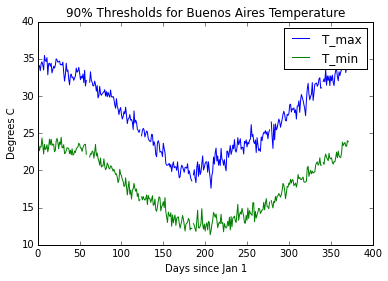

In [37]:
#plot 90% threshold
%matplotlib inline
plt.plot(maxdailytempthreshold[1]) 
plt.plot(mindailytempthreshold[1])
plt.legend(['T_max', 'T_min'])
plt.title('90% Thresholds for Buenos Aires Temperature')
plt.xlabel('Days since Jan 1')
plt.ylabel('Degrees C')

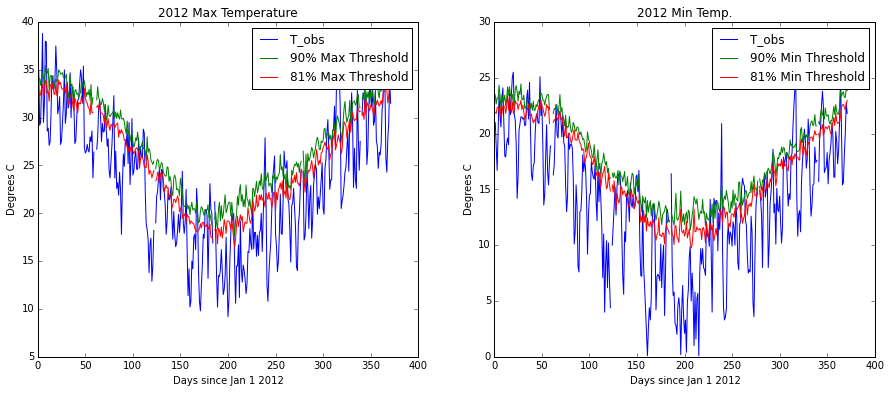

In [14]:
#plot max temp for 2012
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(data[-(12*31*3):-(12*31*2),4])
plt.plot(maxdailytempthreshold[1]) 
plt.plot(maxdailytempthreshold[0]) 
plt.title('2012 Max Temperature')
plt.legend(['T_obs', '90% Max Threshold','81% Max Threshold'])
plt.xlabel('Days since Jan 1 2012')
plt.ylabel('Degrees C')

plt.subplot(1,2,2)
#plot Min temp for 2012
plt.plot(data[-(12*31*3):-(12*31*2),3])
plt.plot(mindailytempthreshold[1]) 
plt.plot(mindailytempthreshold[0]) 
plt.title('2012 Min Temp.')
plt.legend(['T_obs', '90% Min Threshold','81% Min Threshold'])
plt.xlabel('Days since Jan 1 2012')
plt.ylabel('Degrees C')

In [74]:
#which 2012 summer days exceed the maximum 90% threshold
i_start = -(12*31*3)
i_end = -(12*31*2)
hwindices = np.where( data[i_start:i_end,4] > maxdailytempthreshold[1])
np.set_printoptions(suppress=True)
all =  data[hwindices[0]+data.shape[0]+i_start, 0:3]
print all[all[:,1]==1]; print all[all[:,1]==2]; print all[all[:,1]==12]

[[ 2012.     1.     2.]
 [ 2012.     1.     6.]
 [ 2012.     1.     9.]
 [ 2012.     1.    10.]
 [ 2012.     1.    16.]
 [ 2012.     1.    19.]
 [ 2012.     1.    20.]
 [ 2012.     1.    21.]
 [ 2012.     1.    29.]]
[[ 2012.     2.     1.]
 [ 2012.     2.     4.]
 [ 2012.     2.     7.]
 [ 2012.     2.    14.]
 [ 2012.     2.    15.]
 [ 2012.     2.    16.]
 [ 2012.     2.    18.]]
[[ 2012.    12.     2.]
 [ 2012.    12.     3.]
 [ 2012.    12.     5.]
 [ 2012.    12.     9.]
 [ 2012.    12.    10.]
 [ 2012.    12.    12.]
 [ 2012.    12.    24.]]


In [72]:
# which 2012 summer days exceed the minimum 90% threshold 
i_start = -(12*31*3)
i_end = -(12*31*2)
hwindices = np.where( data[i_start:i_end,3] > mindailytempthreshold[1])
np.set_printoptions(suppress=True)
all =  data[hwindices[0]+data.shape[0]+i_start, 0:3]
print all[all[:,1]==1]; print all[all[:,1]==2]; print all[all[:,1]==12]

[[ 2012.     1.    10.]
 [ 2012.     1.    19.]
 [ 2012.     1.    20.]
 [ 2012.     1.    21.]] [[ 2012.     2.     4.]
 [ 2012.     2.     5.]
 [ 2012.     2.     7.]
 [ 2012.     2.    18.]] [[ 2012.    12.     4.]
 [ 2012.    12.     5.]
 [ 2012.    12.     6.]
 [ 2012.    12.    24.]]


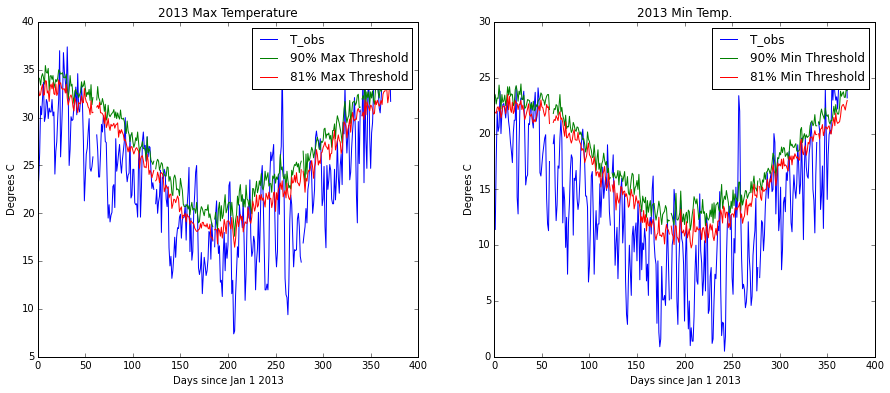

In [243]:
#plot max temp for 2013
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(data[-(12*31*2):-(12*31*1),4])
plt.plot(maxdailytempthreshold[1]) 
plt.plot(maxdailytempthreshold[0]) 
plt.title('2013 Max Temperature')
plt.legend(['T_obs', '90% Max Threshold','81% Max Threshold'])
plt.xlabel('Days since Jan 1 2013')
plt.ylabel('Degrees C')

plt.subplot(1,2,2)
#plot Min temp for 2013
plt.plot(data[-(12*31*2):-(12*31*1),3])
plt.plot(mindailytempthreshold[1]) 
plt.plot(mindailytempthreshold[0]) 
plt.title('2013 Min Temp.')
plt.legend(['T_obs', '90% Min Threshold','81% Min Threshold'])
plt.xlabel('Days since Jan 1 2013')
plt.ylabel('Degrees C')

In [75]:
#which 2013 summer days exceed the maximum 90% threshold
i_start = -(12*31*2)
i_end = -(12*31*1)
hwindices = np.where( (data[i_start:i_end,4] > maxdailytempthreshold[1]) )
np.set_printoptions(suppress=True)
all =  data[hwindices[0]+data.shape[0]+i_start, 0:3]
print all[all[:,1]==1]; print all[all[:,1]==2]; print all[all[:,1]==12]

[[ 2013.     1.    24.]
 [ 2013.     1.    28.]
 [ 2013.     1.    29.]]
[[ 2013.     2.     1.]
 [ 2013.     2.     2.]
 [ 2013.     2.    10.]
 [ 2013.     2.    12.]]
[[ 2013.    12.     2.]
 [ 2013.    12.     7.]
 [ 2013.    12.     8.]
 [ 2013.    12.    13.]
 [ 2013.    12.    14.]
 [ 2013.    12.    15.]
 [ 2013.    12.    16.]
 [ 2013.    12.    17.]
 [ 2013.    12.    18.]
 [ 2013.    12.    22.]
 [ 2013.    12.    23.]
 [ 2013.    12.    24.]
 [ 2013.    12.    25.]
 [ 2013.    12.    26.]
 [ 2013.    12.    28.]
 [ 2013.    12.    29.]
 [ 2013.    12.    30.]]


In [76]:
#which 2013 summer days exceed the minimum 90% threshold
i_start = -(12*31*2)
i_end = -(12*31*1)
hwindices = np.where( (data[i_start:i_end,3] > mindailytempthreshold[1]) )
np.set_printoptions(suppress=True)
all =  data[hwindices[0]+data.shape[0]+i_start, 0:3]
print all[all[:,1]==1]; print all[all[:,1]==2]; print all[all[:,1]==12]

[[ 2013.     1.     7.]
 [ 2013.     1.    30.]
 [ 2013.     1.    31.]]
[[ 2013.     2.     1.]
 [ 2013.     2.     8.]
 [ 2013.     2.     9.]
 [ 2013.     2.    12.]
 [ 2013.     2.    13.]
 [ 2013.     2.    16.]
 [ 2013.     2.    17.]]
[[ 2013.    12.     8.]
 [ 2013.    12.    15.]
 [ 2013.    12.    16.]
 [ 2013.    12.    17.]
 [ 2013.    12.    18.]
 [ 2013.    12.    19.]
 [ 2013.    12.    20.]
 [ 2013.    12.    21.]
 [ 2013.    12.    22.]
 [ 2013.    12.    23.]
 [ 2013.    12.    24.]
 [ 2013.    12.    25.]
 [ 2013.    12.    26.]
 [ 2013.    12.    27.]
 [ 2013.    12.    28.]
 [ 2013.    12.    29.]
 [ 2013.    12.    30.]]


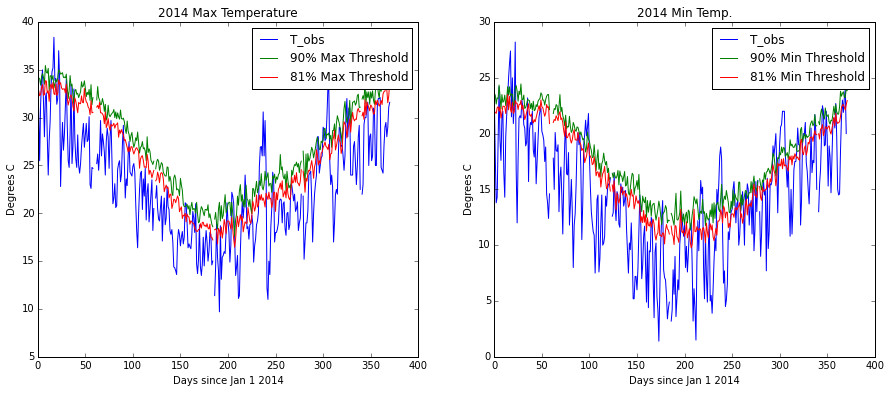

In [81]:
#plot max temp for 2014
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(data[-(12*31*1):,4])
plt.plot(maxdailytempthreshold[1]) 
plt.plot(maxdailytempthreshold[0]) 
plt.title('2014 Max Temperature')
plt.legend(['T_obs', '90% Max Threshold','81% Max Threshold'])
plt.xlabel('Days since Jan 1 2014')
plt.ylabel('Degrees C')

plt.subplot(1,2,2)
#plot Min temp 
plt.plot(data[-(12*31*1):,3])
plt.plot(mindailytempthreshold[1]) 
plt.plot(mindailytempthreshold[0]) 
plt.title('2014 Min Temp.')
plt.legend(['T_obs', '90% Min Threshold','81% Min Threshold'])
plt.xlabel('Days since Jan 1 2014')
plt.ylabel('Degrees C')

In [80]:
#which 2014  days exceed the maximum 90% threshold
i_start = -(12*31*1)

hwindices = np.where( (data[i_start:,4] > maxdailytempthreshold[1]) )
np.set_printoptions(suppress=True)
all =  data[hwindices[0]+data.shape[0]+i_start, 0:3]
print all[all[:,1]==1]; print all[all[:,1]==2]; print all[all[:,1]==12]

[[ 2014.     1.     6.]
 [ 2014.     1.    16.]
 [ 2014.     1.    17.]
 [ 2014.     1.    18.]
 [ 2014.     1.    19.]
 [ 2014.     1.    20.]
 [ 2014.     1.    23.]]
[[ 2014.     2.     5.]
 [ 2014.     2.     8.]]
[]


In [79]:
#which 2014  days exceed the minimum 90% threshold
i_start = -(12*31*1)

hwindices = np.where( (data[i_start:,3] > mindailytempthreshold[1]) )
np.set_printoptions(suppress=True)
all =  data[hwindices[0]+data.shape[0]+i_start, 0:3]
print all[all[:,1]==1]; print all[all[:,1]==2]; print all[all[:,1]==12]

[[ 2014.     1.    16.]
 [ 2014.     1.    17.]
 [ 2014.     1.    18.]
 [ 2014.     1.    20.]
 [ 2014.     1.    23.]]
[[ 2014.     2.     5.]]
[[ 2014.    12.     5.]
 [ 2014.    12.     6.]
 [ 2014.    12.     9.]
 [ 2014.    12.    19.]
 [ 2014.    12.    29.]]


In [112]:
# average number of heatwave days, no threshold
#Temp = data['Value'].values[0:minEndIndex,:] #The temperature data 
#clim = Temp.mean(axis=1) # the temperature 'climatology'
anomaly = df['Tmax'].values -np.tile(maxdailytempthreshold[0], (years, 1)) # the anomaly data

heatwavedays = np.zeros([])

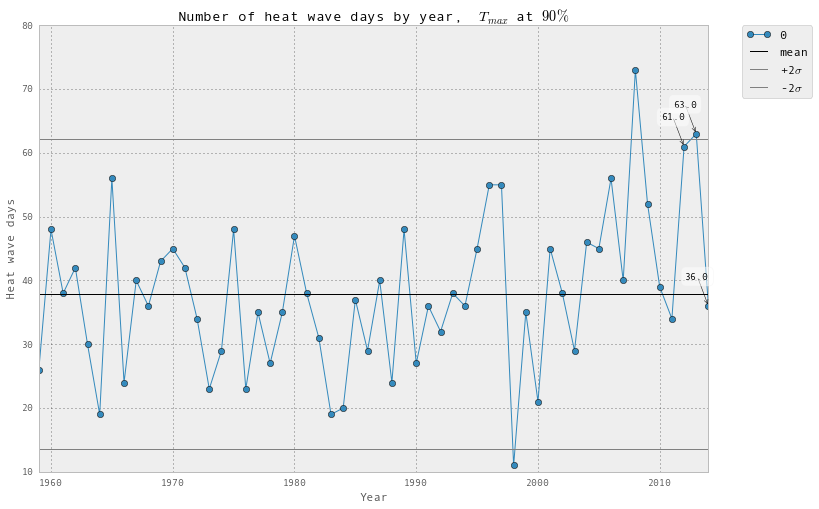

In [312]:
#plot the heat wave days over time
heatwavedaysmax = np.zeros(years)
heatwavedaysmin = np.zeros(years)
meantemp = np.zeros(years)
for y in range(0, years.astype(int)):
#    print data[:,0].reshape([years, 12*31])[y,0]
    anomalymax = data[:,4].reshape([years, 12*31])[y,:] - maxdailytempthreshold[1]
    heatwavedaysmax[y] = anomalymax[anomalymax>0].shape[0]
    
    anomalymin = data[:,3].reshape([years, 12*31])[y,:] - mindailytempthreshold[1]
    heatwavedaysmin[y] = anomalymin[anomalymin>0].shape[0]
    
    meantemp[y]= np.nanmean(data[:,4].reshape([years, 12*31])[y,:])
    
#hwDF = pd.DataFrame(np.array([heatwavedaysmax, heatwavedaysmin]).T, np.arange(1959,2015), columns = ['Heatwave Days, Tmax', 'Heatwave Days, Tmin']) 
hwDF = pd.DataFrame(heatwavedays, np.arange(1959,2015)) 

#hwDF.plot(style = '-o', label = 'Data')
hwDF.plot(style = '-o')

#hwDF.temp.plot(secondary_y=True, style = 'r')

plt.axhline(heatwavedays.mean(), color = 'black', label = 'mean')
plt.axhline(heatwavedays.mean()+ 2*heatwavedays.std(), color = 'grey', label = '+2$\sigma$')
plt.axhline(heatwavedays.mean()-2*heatwavedays.std(), color = 'grey', label = '-2$\sigma$')
plt.xlabel('Year')
plt.ylabel('Heat wave days')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for i in range(1,4):
    plt.annotate(heatwavedaysmax[-i], (x[-i], heatwavedaysmax[-i] ), (0, 25), textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', color = 'black'))
plt.title('Number of heat wave days by year,  $T_{max}$ at $90\%$' )

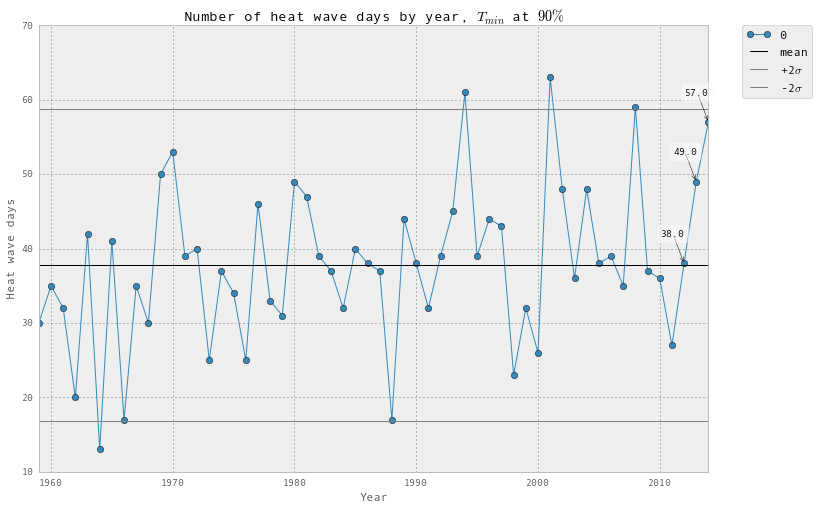

In [299]:
#min temp
heatwavedays = np.zeros(years)
meantemp = np.zeros(years)
for y in range(0, years.astype(int)):
#    print data[:,0].reshape([years, 12*31])[y,0]
    anomaly = data[:,3].reshape([years, 12*31])[y,:] - mindailytempthreshold[1]
    heatwavedays[y] = anomaly[anomaly>0].shape[0]
    meantemp[y]= np.nanmean(data[:,3].reshape([years, 12*31])[y,:])

hwDF = pd.DataFrame(heatwavedays, np.arange(1959,2015)) 
hwDF.plot(style = '-o', label = 'Data')

heatDF = pd.DataFrame(meantemp, np.arange(1959,2015))
#heatDF.plot(style = '-r', secondary_y = True)

plt.axhline(heatwavedays.mean(), color = 'black', label = 'mean')
plt.axhline(heatwavedays.mean()+ 2*heatwavedays.std(), color = 'grey', label = '+2$\sigma$')
plt.axhline(heatwavedays.mean()-2*heatwavedays.std(), color = 'grey', label = '-2$\sigma$')
plt.xlabel('Year')
plt.ylabel('Heat wave days')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for i in range(1,4):
    plt.annotate(heatwavedays[-i], (x[-i], heatwavedays[-i] ), (0, 25), textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', color = 'black'))
    
plt.title('Number of heat wave days by year, $T_{min}$ at $90\%$' )

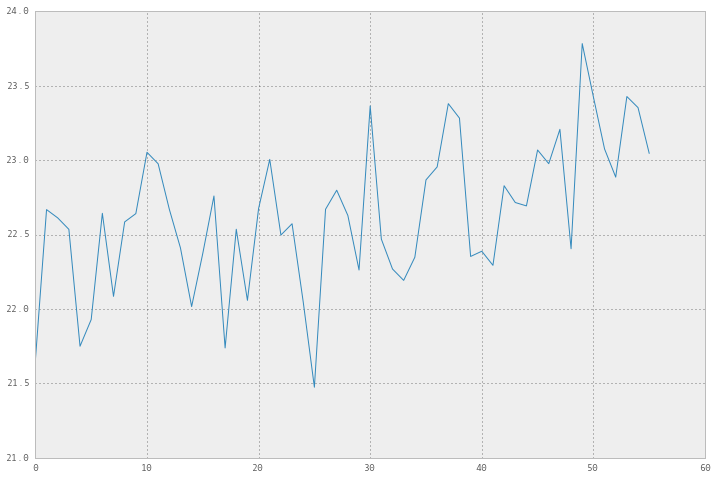

In [298]:
plt.plot(meantemp)

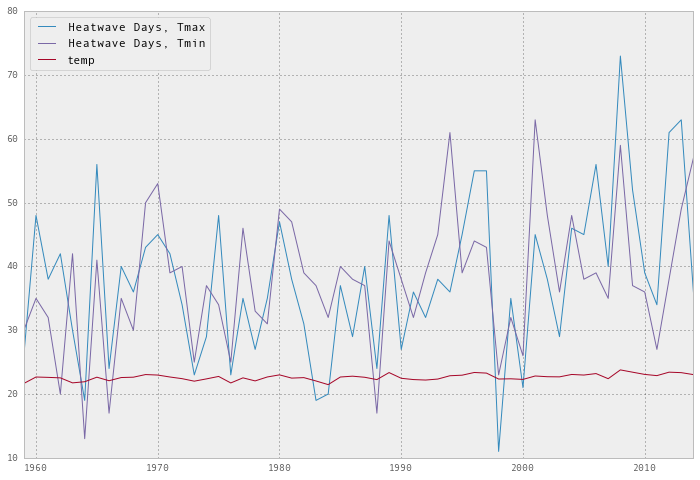

In [305]:
hwDF.plot()